# Import Necessary Liabraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load the Data Set

In [92]:
df=pd.read_csv("Employee Dataset.csv")
df

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,26,3,5,1134
2,2,A,61,8,1,4969
3,3,O,24,3,6,902
4,4,O,39,6,2,3574
5,5,O,32,5,3,2761
6,6,AB,25,4,6,1484
7,7,B,39,8,6,3809
8,8,A,32,5,6,2065
9,9,A,28,4,8,1020


# Fetch the Features Names

In [93]:
df.columns

Index(['id', 'groups', 'age', 'healthy_eating', 'active_lifestyle', 'salary'], dtype='object')

# check the shape of dataset

In [94]:
df.shape

(50, 6)

# Fetch the data type

In [95]:
df.dtypes

id                   int64
groups              object
age                  int64
healthy_eating       int64
active_lifestyle     int64
salary               int64
dtype: object

# Data Preprocessing

In [96]:
df.isnull().sum()

id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
df2=df.drop('id',axis=1)
df2

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,26,3,5,1134
2,A,61,8,1,4969
3,O,24,3,6,902
4,O,39,6,2,3574
5,O,32,5,3,2761
6,AB,25,4,6,1484
7,B,39,8,6,3809
8,A,32,5,6,2065
9,A,28,4,8,1020


In [100]:
df2.shape

(50, 5)

# EDA

### seperate categorical and numerical data

In [101]:
Cat_col=df2.select_dtypes(include='object').columns
Num_col=df2.select_dtypes(exclude='object').columns
print('Categorical_column',Cat_col)
print('Numerical_column',Num_col)

Categorical_column Index(['groups'], dtype='object')
Numerical_column Index(['age', 'healthy_eating', 'active_lifestyle', 'salary'], dtype='object')


### Correlation between numerical features

In [102]:
corr=df2[Num_col].corr()
corr

,age,healthy_eating,active_lifestyle,salary
age,1.000000,0.703395,-0.433615,0.594401
healthy_eating,0.703395,1.000000,-0.068449,0.757873
active_lifestyle,-0.433615,-0.068449,1.000000,-0.495540
salary,0.594401,0.757873,-0.495540,1.000000


### Plotting Heatmap to visualize the correlation

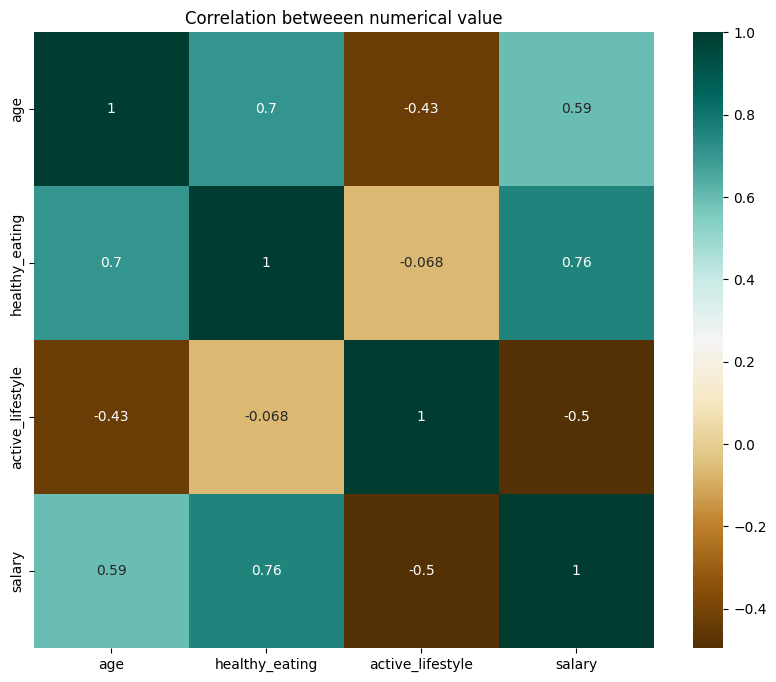

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True,cmap='BrBG')
plt.title('Correlation betweeen numerical value')
plt.show()

### Fetch the descriptive behavior of numerical value

In [104]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50.0,31.88,8.390082,22.0,26.25,30.0,35.75,62.0
healthy_eating,50.0,4.92,1.827678,1.0,3.25,5.0,6.00,9.0
active_lifestyle,50.0,5.90,2.022829,1.0,5.00,6.0,7.00,10.0
salary,50.0,2027.50,1076.861885,556.0,1134.00,1950.0,2732.25,4969.0


### Fetch the concise summary of dataset

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   groups            50 non-null     object
 1   age               50 non-null     int64 
 2   healthy_eating    50 non-null     int64 
 3   active_lifestyle  50 non-null     int64 
 4   salary            50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


### Display the mean for each numerical column

In [106]:
mean_age=df2[Num_col]['age'].mean()
mean_healthy_eating=df2[Num_col]['healthy_eating'].mean()
mean_active_lifestyle=df2[Num_col]['active_lifestyle'].mean()
mean_salary=df2[Num_col]['salary'].mean()
print('mean_age',mean_age)
print('mean_healthy_eating',mean_healthy_eating)
print('mean_active_lifestyle',mean_active_lifestyle)
print('mean_salary',mean_salary)

mean_age 31.88
mean_healthy_eating 4.92
mean_active_lifestyle 5.9
mean_salary 2027.5


### Frequency count for the categorical column 'groups'

In [107]:
group_values_counts=df2['groups'].value_counts()
group_values_counts

groups
A     20
O     18
AB     6
B      6
Name: count, dtype: int64

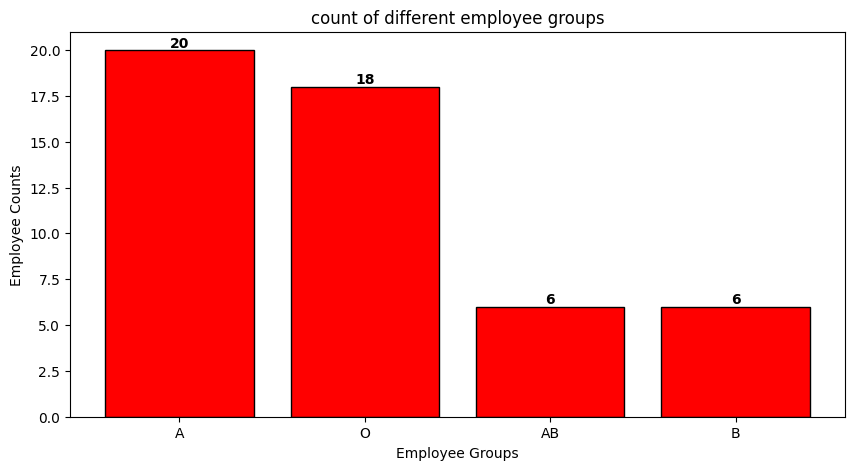

In [63]:
plt.figure(figsize=(10,5))
plt.bar(group_values_counts.index,group_values_counts,color='red',edgecolor='black')
plt.title("count of different employee groups")
plt.xlabel("Employee Groups")
plt.ylabel("Employee Counts")
for i, value in enumerate(group_values_counts):
      plt.text(i,value, str(value), ha='center',va='bottom', fontsize=10, fontweight='bold')

plt.show()

### Plotting box plot for anomalies detection and outliers

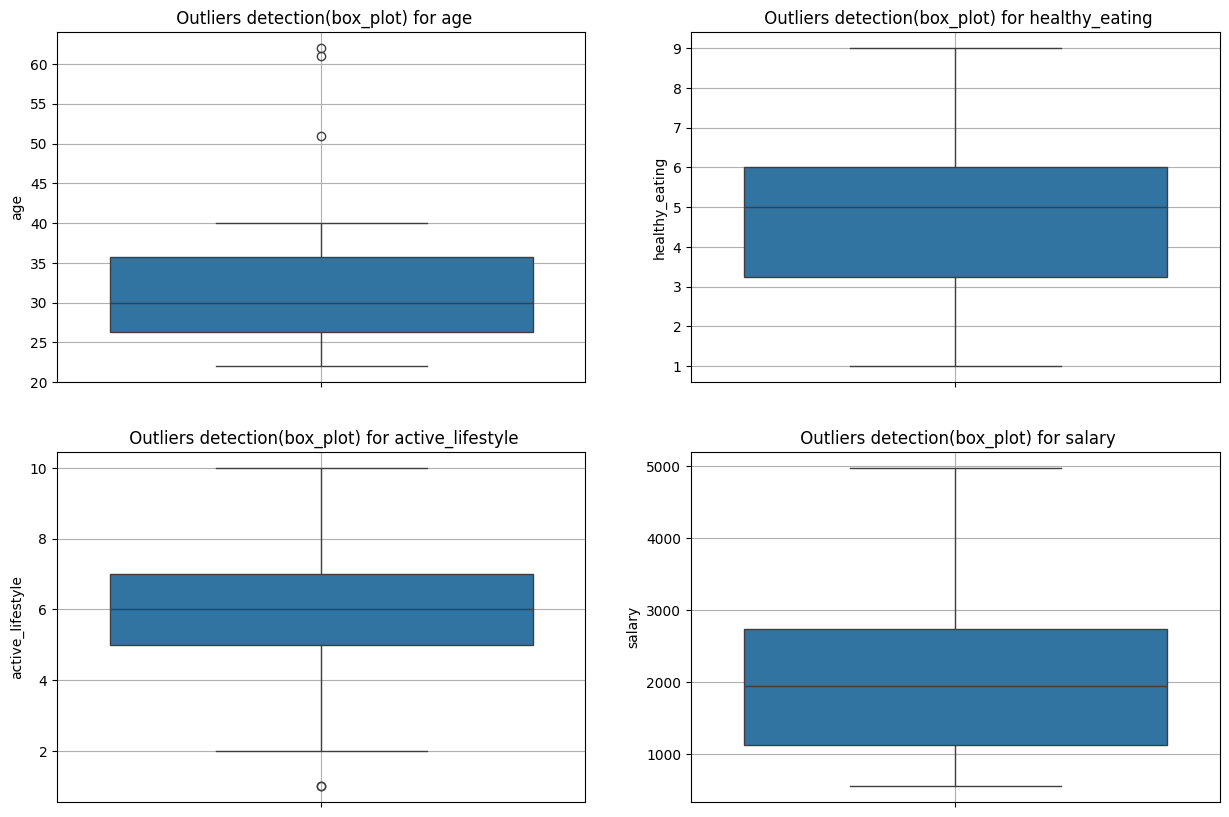

In [108]:
plt.figure(figsize=(15,10))
for i in range(len(Num_col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df2[Num_col[i]])
    plt.title(f' Outliers detection(box_plot) for {Num_col[i]}')
    plt.grid()
plt.show()

## Outliers Treatment & Outliers Capping

In [109]:
col=['age','healthy_eating','active_lifestyle','salary']
a=df[col].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
age,50.0,31.88,8.390082,22.0,30.0,46.05,51.40,56.30,61.02,61.51,62.0
healthy_eating,50.0,4.92,1.827678,1.0,5.0,8.00,8.00,8.00,8.02,8.51,9.0
active_lifestyle,50.0,5.90,2.022829,1.0,6.0,8.55,9.00,9.00,9.02,9.51,10.0
salary,50.0,2027.50,1076.861885,556.0,1950.0,3809.00,3832.12,4115.34,4398.64,4683.82,4969.0


In [110]:
print(df2[df2['age']>46.05].shape)
print(df2[df2['healthy_eating']>9.0].shape)
print(df2[df2['active_lifestyle']>10.0].shape)
print(df2[df2['salary']>4969.0].shape)

(3, 5)
(0, 5)
(0, 5)
(0, 5)


##### Outliers capping

In [111]:
df2['age']=np.where(df2['age']>46.05,46.05,df2['age'])
df2['healthy_eating']=np.where(df2['healthy_eating']>9.0,9.0,df2['healthy_eating'])
df2['active_lifestyle']=np.where(df2['active_lifestyle']>10.0,10.0,df2['active_lifestyle'])
df2['salary']=np.where(df2['salary']>4969.0,4969.0,df2['salary'])

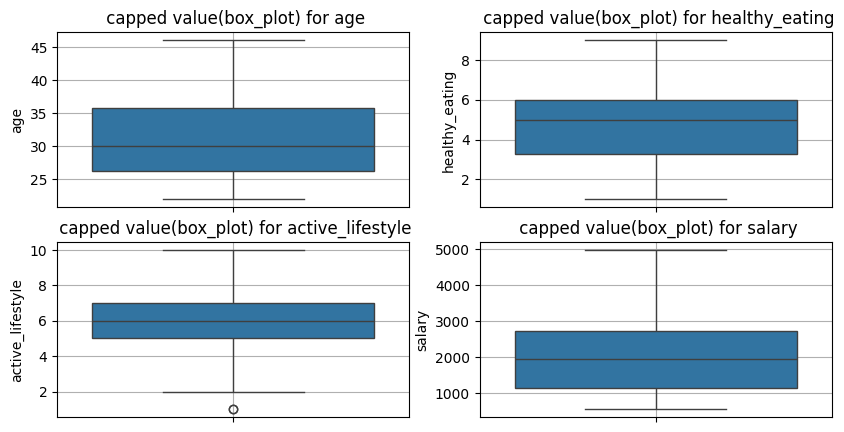

In [112]:
plt.figure(figsize=(10,5))
for i in range (len(Num_col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df2[Num_col[i]])
    plt.title(f' capped value(box_plot) for {Num_col[i]}')
    plt.grid()
plt.show()

### average values of age, healthy_eating, active_lifestyle, and salary within each group

In [150]:
Average_value=df2.groupby('groups')[['age','healthy_eating','active_lifestyle','salary']].mean().reset_index()
Average_value

,groups,age,healthy_eating,active_lifestyle,salary
0,A,30.455000,5.000000,6.400000,1821.700000
1,AB,32.341667,4.833333,5.500000,2084.166667
2,B,31.833333,5.000000,6.333333,2101.333333
3,O,31.333333,4.833333,5.333333,2212.666667


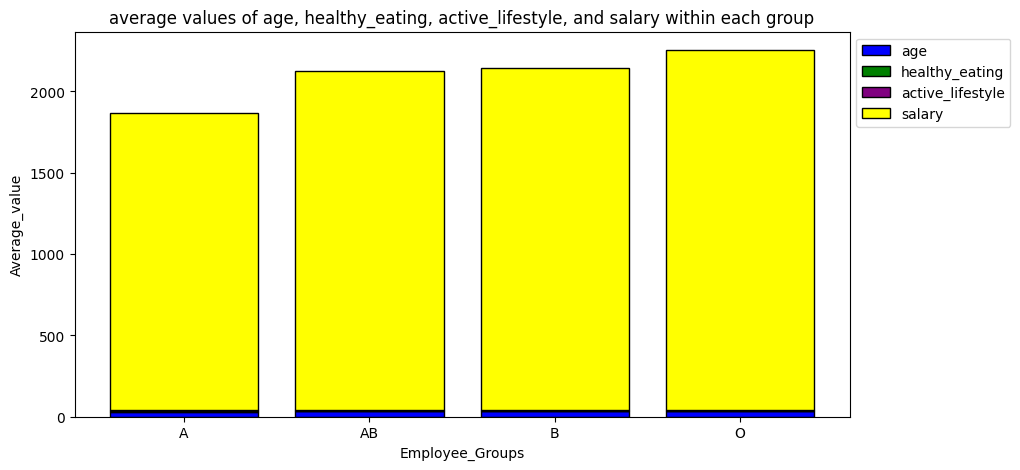

In [149]:
groups=Average_value['groups']

plt.figure(figsize=(10,5))
plt.bar(groups,Average_value['age'],color='blue',edgecolor='black',label='age'),
plt.bar(groups,Average_value['healthy_eating'],bottom=Average_value['age'],color='green',edgecolor='black',label='healthy_eating')
plt.bar(groups,Average_value['active_lifestyle'],bottom=Average_value['age']+Average_value['healthy_eating'],
        color='purple',edgecolor='black',label='active_lifestyle')
plt.bar(groups,Average_value['salary'],bottom=Average_value['age']+Average_value['healthy_eating']+Average_value['active_lifestyle'],
        color='yellow',edgecolor='black',label='salary')
plt.legend(bbox_to_anchor=(1,1))
plt.title('average values of age, healthy_eating, active_lifestyle, and salary within each group')
plt.ylabel('Average_value')
plt.xlabel('Employee_Groups')
plt.show()

### Histograms for age, healthy_eating, active_lifestyle, and salary to visualize the distribution of each numerical variable.

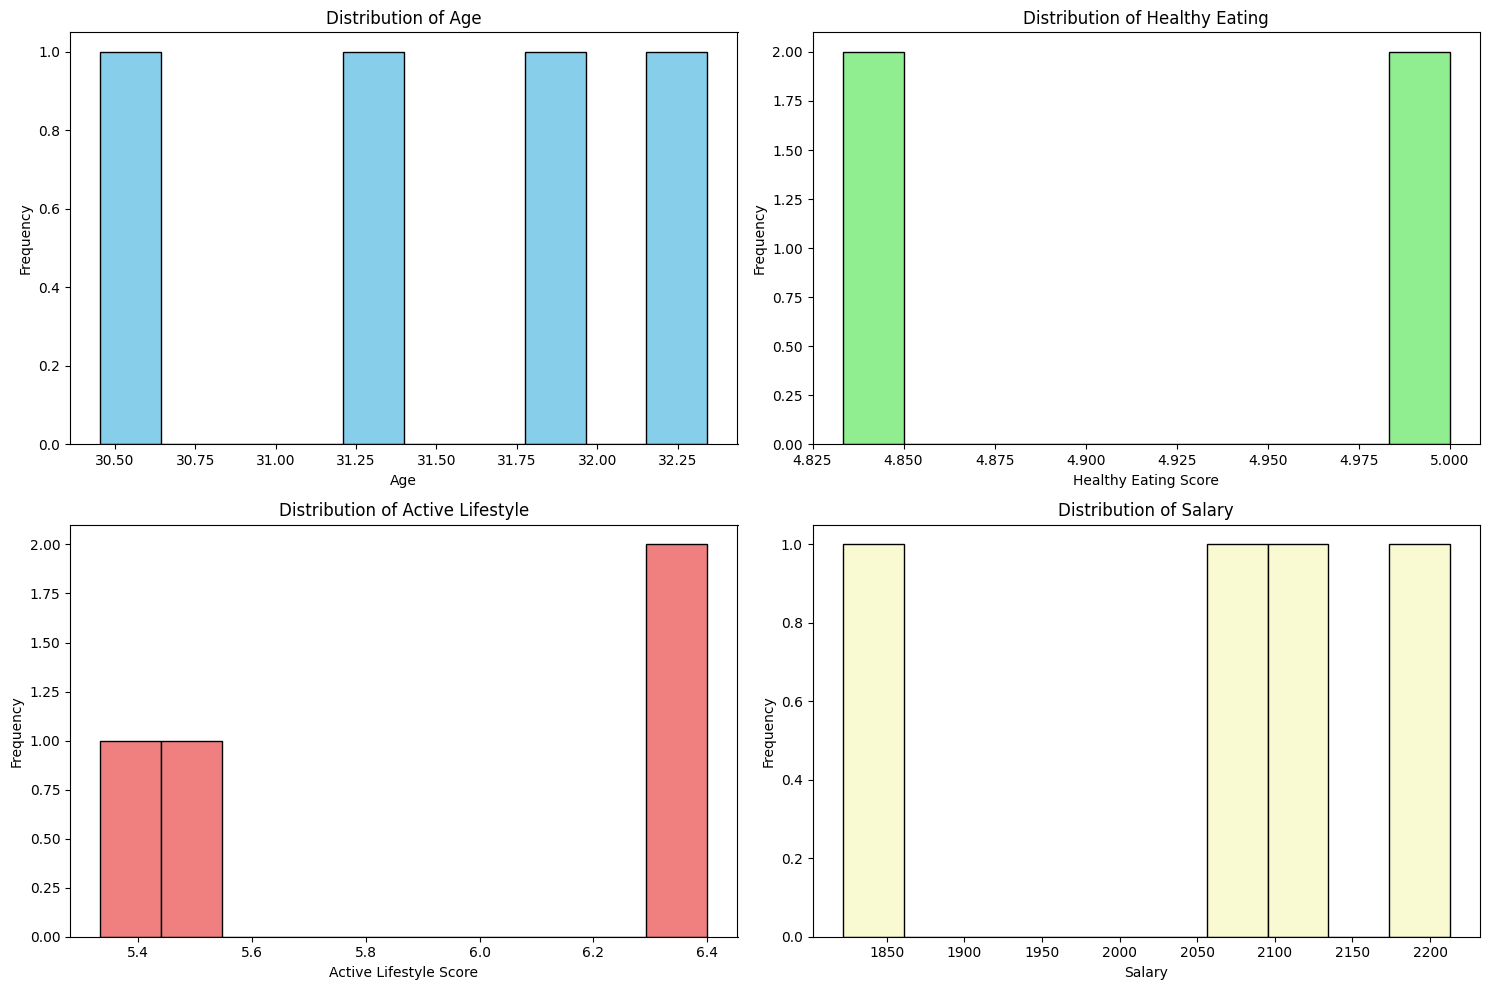

In [152]:

plt.figure(figsize=(15, 10))

# Histogram for 'age'
plt.subplot(2, 2, 1)  
plt.hist(Average_value['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for 'healthy_eating'
plt.subplot(2, 2, 2)  
plt.hist(Average_value['healthy_eating'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Healthy Eating')
plt.xlabel('Healthy Eating Score')
plt.ylabel('Frequency')

# Histogram for 'active_lifestyle'
plt.subplot(2, 2, 3)  
plt.hist(Average_value['active_lifestyle'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Active Lifestyle')
plt.xlabel('Active Lifestyle Score')
plt.ylabel('Frequency')

# Histogram for 'salary'
plt.subplot(2, 2, 4)  
plt.hist(Average_value['salary'], bins=10, color='lightgoldenrodyellow', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
